In [81]:
from sklearn.cluster import KMeans
import keras
from keras.layers import Input, Conv1D,Activation,MaxPooling1D,Dense,Flatten,UpSampling1D
from keras.layers.normalization import BatchNormalization
from keras.models import Model,load_model
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [82]:
gyroModel=load_model('gyroModel.h5')
linearAccModel=load_model('linearAccModel.h5')
gravityModel=load_model('gravityModel.h5')
gameVecModel=load_model('gameVecModel.h5')

gyroFFTModel=load_model('gyroModelFFT.h5')
linearAccFFTModel=load_model('linearAccModelFFT.h5')
gravityFFTModel=load_model('gravityModelFFT.h5')
gameVecFFTModel=load_model('gameVecModelFFT.h5')

In [83]:
gyroEncoder=Model(inputs=gyroModel.input,outputs=gyroModel.layers[13].output)
linearAccEncoder=Model(inputs=linearAccModel.input,outputs=linearAccModel.layers[13].output)
gravityEncoder=Model(inputs=gravityModel.input,outputs=gravityModel.layers[13].output)
gameEncoder=Model(inputs=gameVecModel.input,outputs=gameVecModel.layers[13].output)
gyroFFTEncoder=Model(inputs=gyroFFTModel.input,outputs=gyroFFTModel.layers[13].output)
linearAccFFTEncoder=Model(inputs=linearAccFFTModel.input,outputs=linearAccFFTModel.layers[13].output)
gravityFFTEncoder=Model(inputs=gravityFFTModel.input,outputs=gravityFFTModel.layers[13].output)
gameFFTEncoder=Model(inputs=gameVecFFTModel.input,outputs=gameVecFFTModel.layers[13].output)


In [84]:
data= np.load('watch.npy')
gyro_data=data[:,:,0:3]
linearAcc_data=data[:,:,3:6]
gravity_data=data[:,:,6:9]
gameVec_data=data[:,:,9:13]
gyroFFT_data=data[:,:,13:16]
linearAccFFT_data=data[:,:,16:19]
gravityFFT_data=data[:,:,19:22]
gameVecFFT_data=data[:,:,22:26]

In [85]:
gyro_LV=gyroEncoder.predict(gyro_data).reshape((len(data),-1))
linearAcc_LV=linearAccEncoder.predict(linearAcc_data).reshape((len(data),-1))
gravity_LV=gravityEncoder.predict(gravity_data).reshape((len(data),-1))
game_LV=gameEncoder.predict(gameVec_data).reshape((len(data),-1))
gyroFFT_LV=gyroFFTEncoder.predict(gyroFFT_data).reshape((len(data),-1))
linearAccFFT_LV=linearAccFFTEncoder.predict(linearAccFFT_data).reshape((len(data),-1))
gravityFFT_LV=gravityFFTEncoder.predict(gravityFFT_data).reshape((len(data),-1))
gameFFT_LV=gameFFTEncoder.predict(gameVecFFT_data).reshape((len(data),-1))

In [87]:
data_LV=np.concatenate((gyro_LV,linearAcc_LV,gravity_LV,game_LV,gyroFFT_LV,linearAccFFT_LV,gravityFFT_LV,gameFFT_LV),axis=1)
data_LV.shape

(11196, 768)

In [104]:
kmean=KMeans(n_clusters=6,max_iter=30000)

In [107]:
kmean.fit(data_LV[:,0:768])
y_kmeans=kmean.predict(data_LV[:,0:768])

In [56]:
data_LV.shape

(11196, 1536)

In [17]:
np.save('./data_LV.npy',data_LV)

In [18]:
np.save('./y_kmeans.npy',y_kmeans)

In [156]:
pca=PCA(n_components=2)
pcaComponents=pca.fit_transform(data_LV[:,:768])
pca.explained_variance_ratio_  

array([0.7905104 , 0.04463728], dtype=float32)

In [88]:
pca2 = PCA(0.95)
pca2.fit(data_LV[:,:768])
pcaComponents2=pca2.transform(data_LV[:,:768])

In [89]:
pcaComponents2.shape

(11196, 10)

In [91]:
pcaComponents.shape

(11196, 2)

In [15]:
y_kmeans.shape

(11196,)

In [16]:
data.shape

(11196, 128, 26)

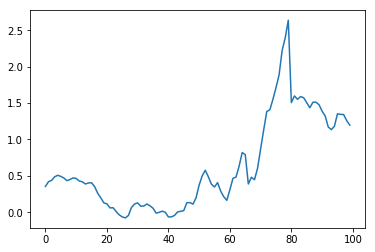

In [72]:
plot(data_LV[0:100,9])

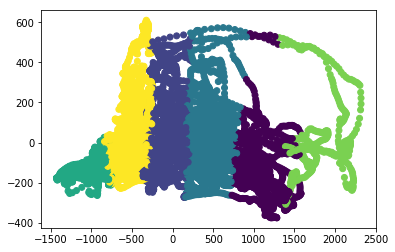

In [108]:
plt.scatter(pcaComponents[:,0],pcaComponents[:,1],c=y_kmeans)

In [130]:
a=

(1000,)

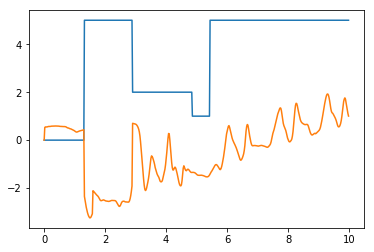

In [153]:
length = 500
plot(np.arange(0,length*0.02,0.02),y_kmeans[0:length])
plot(np.arange(0,length*0.02,0.02),data[0:length,0,9]*5)